# Phase 2

### Use top_restaurants dataset to generate random choices for the user

In [1]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import re

df = pd.read_csv('data/top_restaurants.csv')
df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,750,62,Hunt Brothers Pizza,5.0,11.0,"American, Italian, Wings",$$,"6090 Old Madison Pike NW, Huntsville, AL, 35806",35806,34.713470,-86.658061
1,21570,58,The Italian Gourmet (Vienna),5.0,40.0,"Sandwich, Italian",$$,"505 Maple Ave W, Vienna, VA, 22180",22180,38.895105,-77.274763
2,49999,165,Dante's Italian Eatery - Greenville Ave.,5.0,41.0,"Italian, Pizza, Pasta",$$,"12101 Greenville Ave, Dallas, TX, 75243",75243,32.912241,-96.746114
3,43506,37,Pizza Novo,5.0,10.0,"Pizza, Italian, Sandwich, Wings",$$,"6711 S Fry Rd, Katy, TX, 77494",77494,29.713210,-95.775567
4,12906,294,Soho Teriyaki,5.0,41.0,"Asian, Japanese, Chicken",$$,"10427 SE 240th St, Kent, WA, 98031",98031,47.386597,-122.201217



Feedback per category:
 - Japanese: Likes = 8, Dislikes = 4
 - Chinese: Likes = 7, Dislikes = 2
 - Mediterranean: Likes = 2, Dislikes = 3
 - Italian: Likes = 6, Dislikes = 5
 - Steak: Likes = 7, Dislikes = 3
 - Indian: Likes = 3, Dislikes = 4

After 100 iterations, the user's favorite category is: Japanese


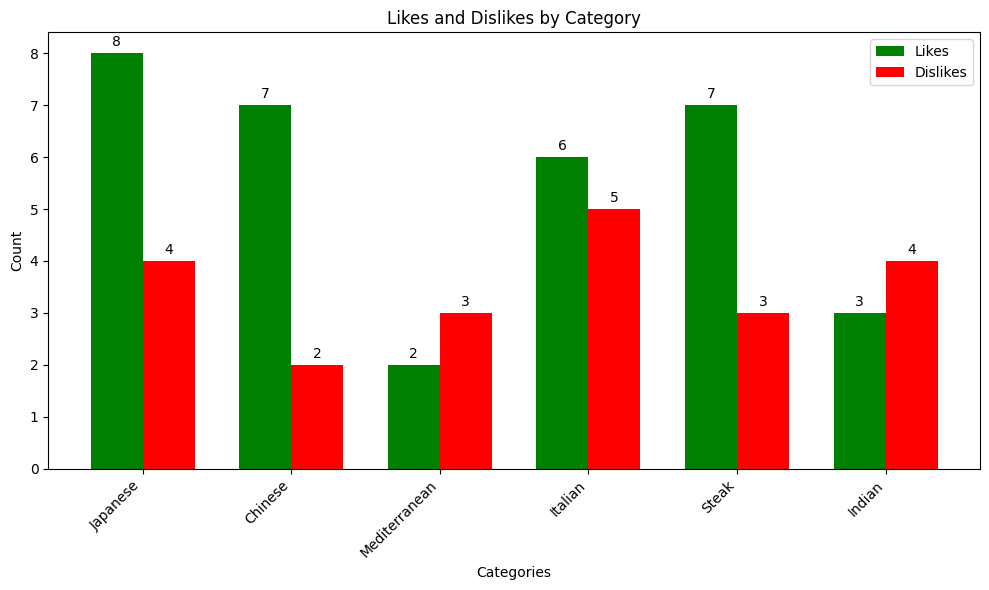

In [2]:
# Define the 7 selected categories
selected_categories = ['steak', 'chinese', 'japanese', 'italian', 'indian', 'mediterranean']

# Initialize a dictionary to track likes and dislikes
category_feedback = defaultdict(lambda: {'likes': 0, 'dislikes': 0})

# Simulate 100 iterations
for _ in range(50):
    # Randomly sample a restaurant
    random_restaurant = df.sample(1).iloc[0]
    restaurant_name = random_restaurant['name']

    # Extract and filter categories
    categories = re.split(r'[,\s]+', random_restaurant['category'].strip())  # Split by comma or space
    filtered_categories = [cat.strip().lower() for cat in categories if cat.strip().lower() in selected_categories]

    # Simulate a binary choice (replace this with user input for interactive use)
    user_choice = random.choice(['like', 'dislike'])  # Replace with input("Do you like this restaurant? (like/dislike): ").strip().lower()

    if filtered_categories:
        # Update feedback counts for each associated valid category
        for category in filtered_categories:
            if user_choice == 'like':
                category_feedback[category]['likes'] += 1
            elif user_choice == 'dislike':
                category_feedback[category]['dislikes'] += 1

# Print feedback for each category
print("\nFeedback per category:")
for category, counts in category_feedback.items():
    print(f" - {category.title()}: Likes = {counts['likes']}, Dislikes = {counts['dislikes']}")

# Determine the user's favorite category based on likes
if category_feedback:
    favorite_category = max(category_feedback, key=lambda x: category_feedback[x]['likes'])
    print(f"\nAfter 100 iterations, the user's favorite category is: {favorite_category.title()}")
else:
    print("No feedback recorded. Cannot determine a favorite category.")



# Visualization with Matplotlib
categories = list(category_feedback.keys())
likes = [category_feedback[cat]['likes'] for cat in categories]
dislikes = [category_feedback[cat]['dislikes'] for cat in categories]

x = np.arange(len(categories))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width / 2, likes, width, label='Likes', color='green')
bars2 = ax.bar(x + width / 2, dislikes, width, label='Dislikes', color='red')

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_title('Likes and Dislikes by Category')
ax.set_xticks(x)
ax.set_xticklabels([cat.title() for cat in categories], rotation=45, ha='right')
ax.legend()

# Annotate bars with counts
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text by 3 points above the bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [3]:
# Step 1: Calculate net score for each category (Likes - Dislikes)
category_scores = {}
for category, counts in category_feedback.items():
    likes = counts['likes']
    dislikes = counts['dislikes']
    net_score = likes - dislikes  # Calculate net score
    category_scores[category] = net_score

# Step 2: Sort categories by net score in descending order
sorted_categories = sorted(category_scores.items(), key=lambda x: x[1], reverse=True)

# Step 3: Get the top 1 or 2 categories (based on the user's preference)
top_categories = sorted_categories[:2]  # Get the top 1 or 2 categories

for category, score in top_categories:
    cuisine = ""
    break

# Output the top categories
print("User's top categories based on net score:")
for category, score in top_categories:
    print(f"{category.title()}: Net Score = {score}")
    cuisine += category + ", "

# Example: Sending top categories to an NLP model
# Assuming you have an NLP model function `send_to_nlp_model(categories)`
# send_to_nlp_model([category for category, score in top_categories])


User's top categories based on net score:
Chinese: Net Score = 5
Japanese: Net Score = 4


In [4]:
#Import cuisine to .env file
import os


# Path to your .env file
env_file_path = '.env'

# Read the contents of the .env file
with open(env_file_path, 'r') as env_file:
    lines = env_file.readlines()

# Check if the CUISINE variable exists in the file and update it, or add a new line
updated = False
with open(env_file_path, 'w') as env_file:
    for line in lines:
        if line.startswith('CUISINE='):
            env_file.write(f'CUISINE={cuisine}\n')  # Update the cuisine
            updated = True
        else:
            env_file.write(line)
    
    if not updated:
        env_file.write(f'CUISINE={cuisine}\n')  # Add the cuisine if it was not found

